In [4]:
import pandas as pd

true = pd.read_csv("/content/drive/MyDrive/Seproject/True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake = pd.read_csv("/content/drive/MyDrive/Seproject/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true['label'] = 1
fake['label'] = 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)
df.shape

(10002, 5)

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,WATCH: Rachel Maddow Laughs At Republican Eff...,House Republicans failed to pass their disastr...,News,"March 24, 2017",0
1,Republican vows 'all hands on deck' in Georgia...,WASHINGTON (Reuters) - A political newcomer wh...,politicsNews,"April 18, 2017",1
2,U.S. House committee launches probe of Allerga...,NEW YORK (Reuters) - A U.S. House of Represent...,politicsNews,"October 3, 2017",1
3,U.S. lawmakers reach deal on Russia sanctions ...,WASHINGTON (Reuters) - U.S. Republicans and De...,politicsNews,"July 22, 2017",1
4,U.S. Senate number two Democrat calls Trump's ...,WASHINGTON (Reuters) - The U.S. Senate’s numbe...,politicsNews,"May 15, 2017",1


In [13]:
X = df.drop('label', axis=1)
y = df['label']
df = df.dropna()
messages = df.copy()
messages.reset_index(inplace=True)
messages.head()

,index,title,text,subject,date,label
0,0,WATCH: Rachel Maddow Laughs At Republican Eff...,House Republicans failed to pass their disastr...,News,"March 24, 2017",0
1,1,Republican vows 'all hands on deck' in Georgia...,WASHINGTON (Reuters) - A political newcomer wh...,politicsNews,"April 18, 2017",1
2,2,U.S. House committee launches probe of Allerga...,NEW YORK (Reuters) - A U.S. House of Represent...,politicsNews,"October 3, 2017",1
3,3,U.S. lawmakers reach deal on Russia sanctions ...,WASHINGTON (Reuters) - U.S. Republicans and De...,politicsNews,"July 22, 2017",1
4,4,U.S. Senate number two Democrat calls Trump's ...,WASHINGTON (Reuters) - The U.S. Senate’s numbe...,politicsNews,"May 15, 2017",1


# Preprocessing 

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# TFidf Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
y = messages['label']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [34]:
count_df = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
count_df.head(3)

,aa,aaa,aaaaaaaand,aaaaackkk,aaaaapkfhk,aaaand,aaaarrgh,aaccording,aacnr,aaf,aahd,aai,aaj,aaja,aal,aalberts,aaldef,aaliyah,aaofj,aaouj,aapl,aapq,aar,aargh,aaron,aaroncovfefe,aaronkatersky,aaronshhh,aarp,aaski,aasnd,aau,aax,aaxakdek,ab,aba,abaaouddinajpur,aback,abad,abadi,...,zvjls,zvlwlnw,zvmhlglys,zvtpnsro,zvtr,zvugtionr,zvv,zvvqnxeiq,zvxfqk,zvxkebig,zwe,zwgrt,zwmrwhq,zwpwo,zwqncolapk,zwv,zww,zwzmhopsep,zx,zxf,zxi,zxsffo,zxygwws,zy,zye,zyf,zyj,zyklon,zymo,zypries,zyries,zz,zzbluecomet,zzgaahg,zzlo,zzomtmd,zzsg,zztaine,zzzzaaaacccchhh,zzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Passive Aggressive Classifier - Baseline

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.995


Confusion matrix, without normalization


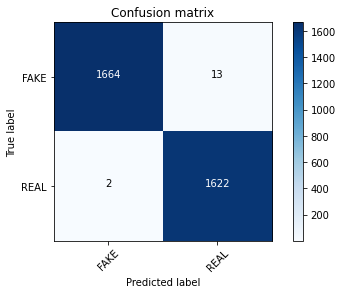

In [36]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Saving model and TFIDF Vectorizer

In [37]:
from sklearn.externals import joblib
joblib.dump(classifier, 'model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']

In [39]:
joblib.dump(vectorizer, 'tfidfvect.pkl')

['tfidfvect.pkl']